In [74]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif',
    rc={'font.size':12, 'mathtext.fontset': 'cm', 'axes.labelpad':0, 'axes.linewidth': 0.5})

# WM

### Plot histogram of percent errors across subjects, colored by z

In [75]:
z0 = pd.read_pickle(f"data/WM_z0.0.pkl").query("type=='model-WM'")
z01 = pd.read_pickle(f"data/WM_z0.1.pkl").query("type=='model-WM'")
z02 = pd.read_pickle(f"data/WM_z0.2.pkl").query("type=='model-WM'")
z04 = pd.read_pickle(f"data/WM_z0.4.pkl").query("type=='model-WM'")
z05 = pd.read_pickle(f"data/WM_z0.5.pkl").query("type=='model-WM'")
z07 = pd.read_pickle(f"data/WM_z0.7.pkl").query("type=='model-WM'")
z10 = pd.read_pickle(f"data/WM_z1.0.pkl").query("type=='model-WM'")
z15 = pd.read_pickle(f"data/WM_z1.5.pkl").query("type=='model-WM'")
combined = pd.concat([z0, z01, z02, z04, z05, z07, z10, z15], ignore_index=True)

dfs = []
columns = ['type', 'sid', 'z', 'percent error']
for z in combined['z'].unique():
    for sid in combined['sid'].unique():
        subdata = combined.query("z==@z & sid==@sid")
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing z={z} sid={sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        df = pd.DataFrame([['model-WM', sid, str(z), percent_error]], columns=columns)
        dfs.append(df)
reduced = pd.concat(dfs, ignore_index=True)

### Find the z which minimizes error for each sid, and save the data from that model

In [76]:
dfs = []
dfs_reduced = []
columns_reduced = ['type', 'sid', 'z', 'percent error']
for sid in combined['sid'].unique():
    error_min = 1.0
    z_best = None
    for z in combined['z'].unique():
        subdata = combined.query("z==@z & sid==@sid")
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing z={z} sid={sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        if percent_error < error_min:
            error_min = percent_error
            z_best = z
    bestdata = combined.query("z==@z_best & sid==@sid")
    dfs.append(bestdata)
    dfs_reduced.append(pd.DataFrame([['model-WM', sid, 'best', error_min]], columns=columns_reduced))
fitted = pd.concat(dfs, ignore_index=True)
reduced_fitted = pd.concat(dfs_reduced, ignore_index=True)

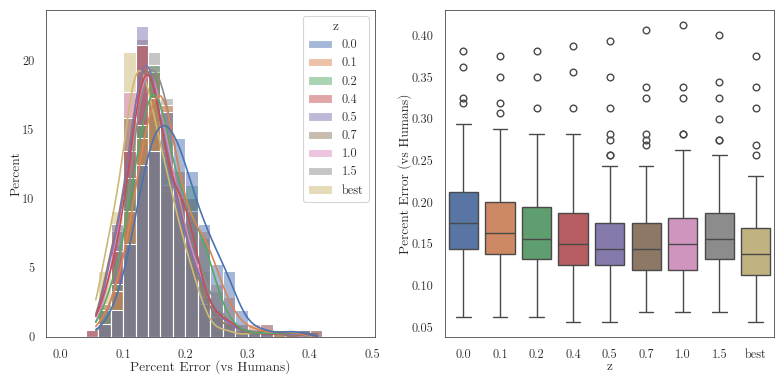

In [77]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0.0, 0.5, 0.02)
withbest = pd.concat([reduced, reduced_fitted], ignore_index=True)

sns.histplot(withbest, x='percent error', hue='z', ax=axes[0], stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(withbest, x='z', y='percent error', hue='z', ax=axes[1])
axes[0].set(xlabel="Percent Error (vs Humans)") 
axes[1].set(xlabel="z", ylabel='Percent Error (vs Humans)') 
plt.tight_layout()
fig.savefig("plots/wm_errors.png", dpi=600)

#### Scan ```k```

In [92]:
z0k05 = pd.read_pickle(f"data/WM_z00k05.pkl").query("type=='model-WM'")
z0k09 = pd.read_pickle(f"data/WM_z00k09.pkl").query("type=='model-WM'")
z0k1 = pd.read_pickle(f"data/WM_z00k10.pkl").query("type=='model-WM'")
z0k11 = pd.read_pickle(f"data/WM_z00k11.pkl").query("type=='model-WM'")
z0k15 = pd.read_pickle(f"data/WM_z00k15.pkl").query("type=='model-WM'")
combined = pd.concat([z0k05, z0k09, z0k1, z0k11, z0k15], ignore_index=True)

dfs = []
columns = ['type', 'sid', 'z', 'k', 'percent error']
for k in combined['k'].unique():
    for sid in combined['sid'].unique():
        subdata = combined.query("k==@k & sid==@sid")
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing k={k} sid={sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        df = pd.DataFrame([['model-WM', sid, str(z), str(k), percent_error]], columns=columns)
        dfs.append(df)
reduced = pd.concat(dfs, ignore_index=True)

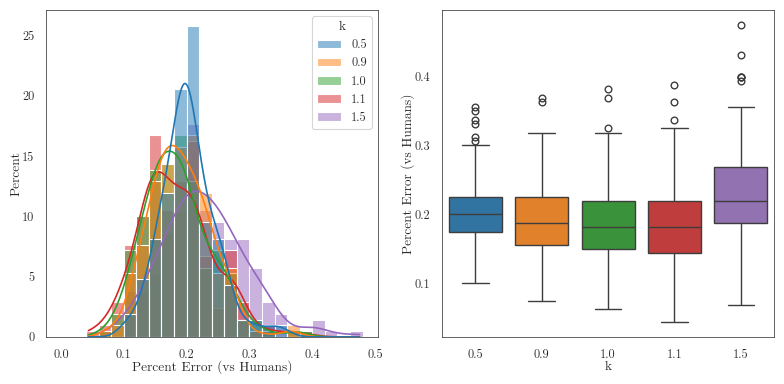

In [93]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0.0, 0.5, 0.02)
ks = reduced['k'].unique()

sns.histplot(reduced, x='percent error', hue='k', ax=axes[0], palette=palette[:len(ks)], stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(reduced, x='k', y='percent error', hue='k', ax=axes[1], palette=palette[:len(ks)])
axes[0].set(xlabel="Percent Error (vs Humans)") 
axes[1].set(xlabel="k", ylabel='Percent Error (vs Humans)') 
plt.tight_layout()
fig.savefig("plots/wm_errors_k.png", dpi=600)

#### ```z``` and ```k```

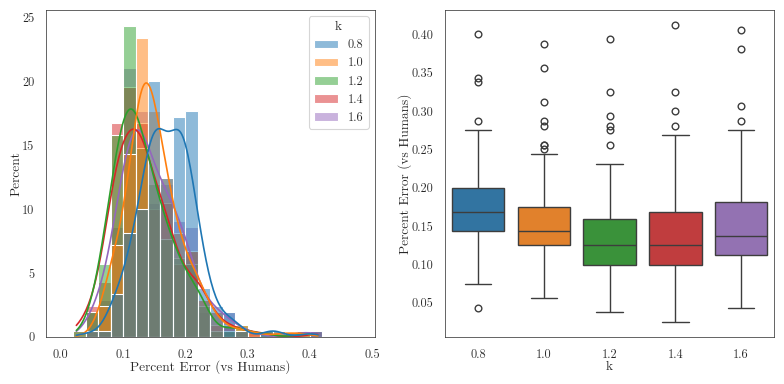

In [102]:
z05k08 = pd.read_pickle(f"data/WM_z05k08.pkl").query("type=='model-WM'")
z05k10 = pd.read_pickle(f"data/WM_z05k10.pkl").query("type=='model-WM'")
z05k12 = pd.read_pickle(f"data/WM_z05k12.pkl").query("type=='model-WM'")
z05k14 = pd.read_pickle(f"data/WM_z05k14.pkl").query("type=='model-WM'")
z05k16 = pd.read_pickle(f"data/WM_z05k16.pkl").query("type=='model-WM'")
combined = pd.concat([z05k08, z05k10, z05k12, z05k14, z05k16], ignore_index=True)

dfs = []
columns = ['type', 'sid', 'z', 'k', 'percent error']
for k in combined['k'].unique():
    for sid in combined['sid'].unique():
        subdata = combined.query("k==@k & sid==@sid")
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing k={k} sid={sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        df = pd.DataFrame([['model-WM', sid, str(z), str(k), percent_error]], columns=columns)
        dfs.append(df)
reduced = pd.concat(dfs, ignore_index=True)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0.0, 0.5, 0.02)
ks = reduced['k'].unique()

sns.histplot(reduced, x='percent error', hue='k', ax=axes[0], palette=palette[:len(ks)], stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(reduced, x='k', y='percent error', hue='k', ax=axes[1], palette=palette[:len(ks)])
axes[0].set(xlabel="Percent Error (vs Humans)") 
axes[1].set(xlabel="k", ylabel='Percent Error (vs Humans)') 
plt.tight_layout()
fig.savefig("plots/wm_errors_zk.png", dpi=600)

# RL

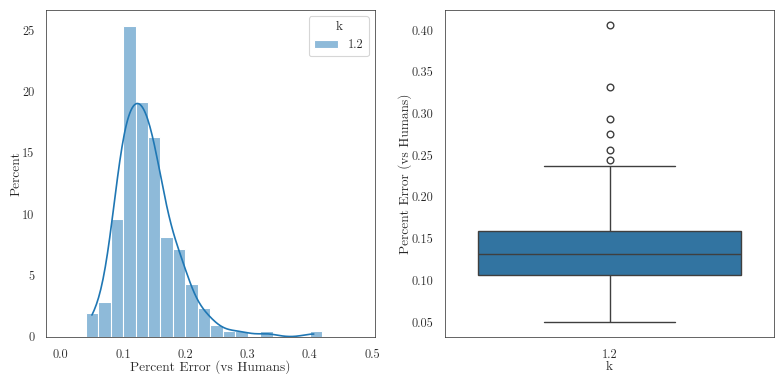

In [103]:
z05k12 = pd.read_pickle(f"data/RL_z05k12.pkl").query("type=='model-RL'")
combined = pd.concat([z05k12], ignore_index=True)

dfs = []
columns = ['type', 'sid', 'z', 'k', 'percent error']
for k in combined['k'].unique():
    for sid in combined['sid'].unique():
        subdata = combined.query("k==@k & sid==@sid")
        errors = subdata['error'].to_numpy()
        if len(errors)==0:
            print(f"missing k={k} sid={sid}")
            continue
        percent_error = np.sum(errors) / len(errors)
        df = pd.DataFrame([['model-RL', sid, str(z), str(k), percent_error]], columns=columns)
        dfs.append(df)
reduced = pd.concat(dfs, ignore_index=True)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
bins = np.arange(0.0, 0.5, 0.02)
ks = reduced['k'].unique()

sns.histplot(reduced, x='percent error', hue='k', ax=axes[0], palette=palette[:len(ks)], stat='percent', bins=bins, kde=True, common_norm=False)
sns.boxplot(reduced, x='k', y='percent error', hue='k', ax=axes[1], palette=palette[:len(ks)])
axes[0].set(xlabel="Percent Error (vs Humans)") 
axes[1].set(xlabel="k", ylabel='Percent Error (vs Humans)') 
plt.tight_layout()
fig.savefig("plots/rl_errors_zk.png", dpi=600)

# Fit statistical models

In [108]:
human = pd.read_pickle(f"data/wmnew_1.pkl").query("type=='human'")
wm = pd.read_pickle(f"data/wmnew_1.pkl").query("type=='model-WM'")
rl = pd.read_pickle(f"data/rlnew_1.pkl").query("type=='model-RL'")
data = pd.concat([human, wm, rl], ignore_index=True)

In [111]:
print(data.query("trial==39"))

         type  sid  trial  stage  obs  action  estimate error     z     k
368     human    1     39      0    0      -1      None  None  None  None
369     human    1     39      1    1      -1      None  None  None  None
370     human    1     39      1    0      -1      None  None  None  None
371     human    1     39      1    1      -1      None  None  None  None
372     human    1     39      2    1       1      None  None  None  None
373     human    1     39      2    1       1      None  None  None  None
374     human    1     39      2    1       1      None  None  None  None
375     human    1     39      3    1       1      None  None  None  None
376     human    1     39      3    1       1      None  None  None  None
377     human    1     39      3    1       1      None  None  None  None
750  model-WM    1     39      0    0      -1 -0.954987     0   0.5   1.2
751  model-WM    1     39      1    1      -1 -0.123287     0   0.5   1.2
752  model-WM    1     39      1    0 

In [154]:
def likelihood(param, data):
    learning_rate = param[0]
    inv_temp = param[1]
    NLL = 0
    trials = data['trial'].unique()
    stages = data['stage'].unique()
    for trial in trials:
        for stage in stages:
            observations = data.query("trial==@trial & stage==@stage")['obs'].to_numpy()
            if stage==0:
                expectation = observations[0]
            else:
                for obs in observations:
                    # print('e old', expectation)
                    error = obs - expectation
                    expectation += learning_rate * error
                    # print('obs', obs)
                    # print('e new', expectation)
            act = data.query("trial==@trial & stage==@stage")['action'].unique()[0]
            # print('stage', stage, 'expectation', expectation, 'action', act)
            prob = scipy.special.expit(inv_temp*expectation)
            NLL -= np.log(prob) if act==1 else np.log(1-prob)
    return NLL

In [158]:
# for model_type in model_types:
#     for sid in sids:
data = pd.read_pickle(f"data/WM_obs.pkl").query("type=='human'")
param0 = [0.1, 10]
bounds = [(0,1), (0,50)]
subdata = data.query("type=='human' & sid==2")
result = scipy.optimize.minimize(likelihood, param0, subdata, bounds=bounds, options={'disp':True})
best_params = result.x
min_NLL = result.fun

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99794D+02    |proj g|=  1.00000D+01

At iterate    1    f=  1.10904D+02    |proj g|=  4.50000D+01

At iterate    2    f=  8.40571D+01    |proj g|=  1.00000D+00

At iterate    3    f=  7.57708D+01    |proj g|=  7.86531D+00

At iterate    4    f=  6.79456D+01    |proj g|=  1.19582D+01

At iterate    5    f=  6.51810D+01    |proj g|=  1.19646D+01

At iterate    6    f=  6.33026D+01    |proj g|=  9.69978D+00

At iterate    7    f=  5.79773D+01    |proj g|=  4.78306D+00

At iterate    8    f=  5.59128D+01    |proj g|=  1.44426D+00

At iterate    9    f=  5.55393D+01    |proj g|=  7.05133D-01

At iterate   10    f=  5.54871D+01    |proj g|=  3.03428D-01

At iterate   11    f=  5.54851D+01    |proj g|=  2.11664D-02

At iterate   12    f=  5.54851D+01    |proj g|=  1.44667D-03

At iterate   13    f=  5.5

In [159]:
best_params

array([0.30137263, 3.94592232])

In [157]:
min_NLL

55.48509913742004